# Age Distribution Similarity
## Author: Snigdhayan Mahanta

Consider two companies of similar size in terms of the number of employees. We want to assess the similarity of the workforce age profiles between the two companies. 

For this purpose I generated two companies of similar size with slightly different age distributions. I computed the `KL Divergence` between the actual age distributions (using the library `Philentropy` - https://rdrr.io/cran/philentropy/f/README.md) and then estimated it by a naive sampling strategy. 

In [1]:
# Include library
library("philentropy")

In [2]:
# Create companies with slight different age distributions
pop_size <- 10000
set.seed(123)

# Create asymmetric normal distributions
population1 <- c(rnorm(pop_size, mean = 32, sd = 3), runif(pop_size*0.8, min = 20, max = 30))
population2 <- c(rnorm(pop_size, mean = 30, sd = 6), runif(pop_size*0.8, min = 20, max = 30))

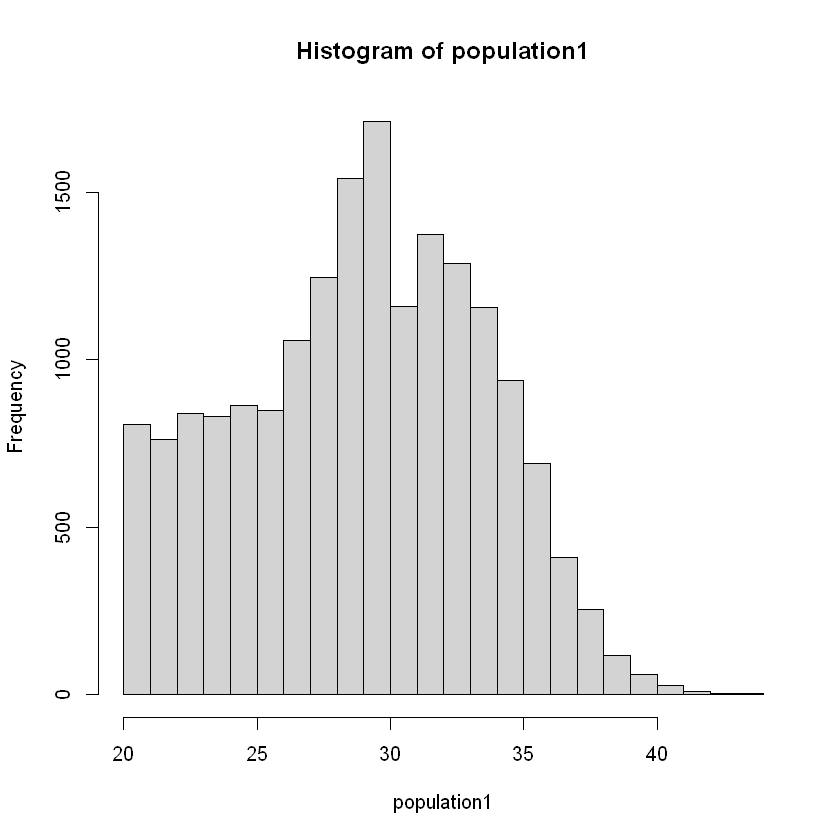

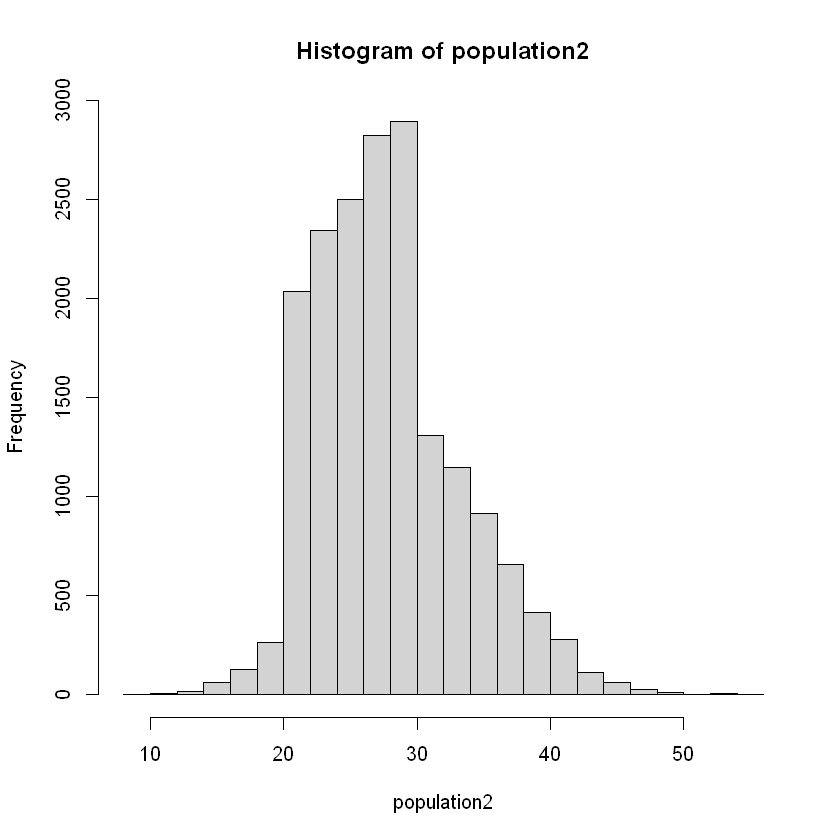

In [3]:
# Plot histogram
n_buckets <- 20
hist(population1, breaks = n_buckets)
hist(population2, breaks = n_buckets)

In [4]:
# Compute densities
pd1 <- density(population1, n = n_buckets)
pd1 <- pd1$y

pd2 <- density(population2, n = n_buckets)
pd2 <- pd2$y

In [ ]:
# Compute actual KL Divergence
actual_kl <- KL(rbind(pd1, pd2), unit = "log2")

In [6]:
# Define sampling mechanism - no. of sampling trials and sample size for each trial
trials = 100
sample_size = 1000

In [ ]:
# Generate sample statistics
mySample <- numeric(trials)
for (i in c(1:trials)) {
  sample1 <- sample(population1, size = sample_size, replace = TRUE)  
  pd1 <- density(sample1, n = n_buckets)
  pd1 <- pd1$y
    
  sample2 <- sample(population2, size = sample_size, replace = TRUE)
  pd2 <- density(sample2, n = n_buckets)
  pd2 <- pd2$y
    
  mySample[i] <- KL(rbind(pd1, pd2), unit = "log2")
}

In [8]:
# Compute estimate for the KL Divergence
estimated_kl <- mean(mySample)

In [9]:
# Compare the estimated value with the actual value
result <- rbind(" " = c("Actual", "Estimated"),
                "KL Divergence" = c(actual_kl, estimated_kl))
result

,kullback-leibler,
,Actual,Estimated
KL Divergence,1.1572359524908,0.777995306448007


`KL Divergence` can be used as a measure of dissimilarity or deviation from a desired distribution. However, the naive sampling strategy to estimate it is far from satisfactory.